## Market Segmentation Example

### Import the Relevant Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the Data

The data is located in the 3.12. Example.csv file.

In [7]:
data = pd.read_csv('3.12. Example.csv')

In [9]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In this CSV, we have data from a retail shop. There are 30 observations, and each observation is a client with their respective satisfaction and brand loyalty score. 

How the data was gathered: 

-Satisfaction is self-reported, asking customers to rate their shopping experience from 1 to 10, with 10 being 'Extremely Satisfied'. Therefore, satisfaction is a discrete variable that takes integer values from 1 to 10. (Type of data: discrete, range: 1,2,3,4,5,6,7,8,9,10).

-Brand Loyalty, on the other hand, is a tricky metric. There is no widely accepted technique to measure it, but there are proxies like 'churn rate', 'retention rate', and 'customer lifetime value (CLV)'. In this dataset, Brand Loyalty was measured through the number of purchases from that shop for a year and several other factors found to be significant. The range is from -2.5 to 2.5, as the variable is already standardized. This is something that often occurs, especially when creating latent variables like this one. 

Now, let's plot the data:

Text(0, 0.5, 'Loyalty')

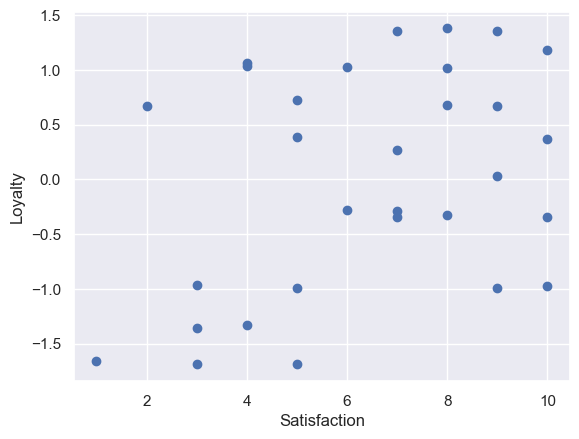

In [12]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We can kind of identify two clusters in this data by looking at the graph. Before we perform any analyses on this data, let's reason about the problem:

We can divide graph into 4 squares:

1.) Low Satisfaction, low loyalty - from 0.0 to -2.0 Loyalty and from 0 to 5 Satisfaction

2.) Low Satisfaction, high loyalty - from 0.0 to 1.5 Loyalty and from 0 to 5 Satisfaction

3.) High Satisfaction, high loyalty - from 0.0 to 1.5 Loyalty and from 5 to 10 Satisfaction

4.) High satisfaction, low loyalty - from 0.0 to -2.5 Loyalty and from 5 to 10 Satisfaction

Going back to our 2 cluster solution, we realize it doesnt make much sense. What would these clusters represent? The first one looks like low satisfaction and low loyalty, but the other one is all over the place. So, it seems that a 2 cluster solution won't cut it. 

### Select the Features

In [17]:
x = data.copy()

### Clustering

In [20]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

### Clustering Results

Clusters is a duplicate of x, and the column cluster_pred of this data frame will contain the cluster where a particular observation was predicted to be placed by the algorithm:

In [24]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Now, let's plot the data:

Text(0, 0.5, 'Loyalty')

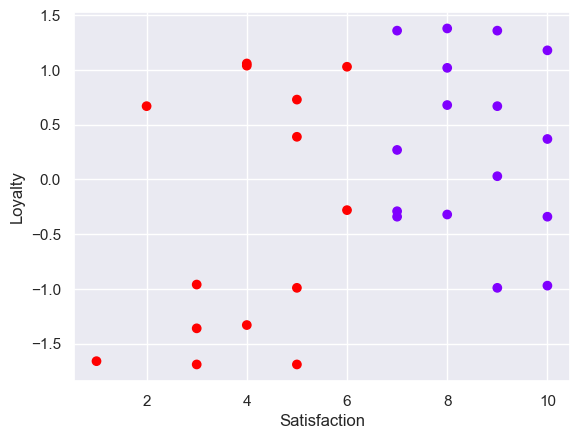

In [29]:
plt.scatter(data['Satisfaction'],data['Loyalty'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

What we see are two clusters, but they aren't the two we were thinking, were they? 

If you look at the plot closely, you'll notice that there is a cut-off line at the Satisfaction value of 6. Everything on the right is one cluster, and everything on the left, the other. 

This solution may make sense to some, but most probably, the algorithm ONLY considered satisfaction as a feature. This is because we did not standardize the variable - the satisfaction values are much higher than those of 'Loyalty', and k-means, more or less, disregarded 'Loyalty' as a feature. 

Whenever we cluster on the basis of a single feature, the result will look like this - as if it was cut off by a vertical line. This is one of the ways to spot if something fishy is going on. 

Okay, so 'Satisfaction' and 'Loyalty' seem equally important features for market segmentation. So how do we fix this problem (i.e. How can we give them equal weight)? 

That's correct, we need to standardize 'Satisfaction'. There are several ways to do this in Sklearn, but the simplest way to do this is through the 'preprocessing' module:

### Standardize the Variables

In [32]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

sklearn.preprocessing.scale(x) is a method that scales (standardizes with mean 0, and standard deviation of 1, by default) each variable (column) separately. So each column will be standardized, with respect to itself, using this method. This is exactly what we need to do. 

In [35]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

As you can see, x_scaled is an array which contains the standardized 'satisfaction' and the same values for 'Loyalty'. This is because 'Loyalty' was already standardized - it had a mean of 0 and a standard deviation of 1, that is. 

Since we don't know the number of clusters needed, the 'Elbow Method' will come in handy:

### Take Advantage of the Elbow Method

In [42]:
wcss= []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[59.999999999999986,
 29.818973034723147,
 18.129659446063226,
 10.24718180592842,
 7.792695153937187,
 6.662211548281464,
 5.660413037009096,
 4.675049672733828,
 4.70473006413081]

Note that the range is from 1 to 10, so we will get a wcss for 1,2,3,4,5,6,7,8, and 9 cluster solutions, which was an aribrarily chosen number(you can choose any range you think would fit).

Finally, let's plot WCSS against the number of clusters, as we did in previous lectures:

Text(0, 0.5, 'WCSS')

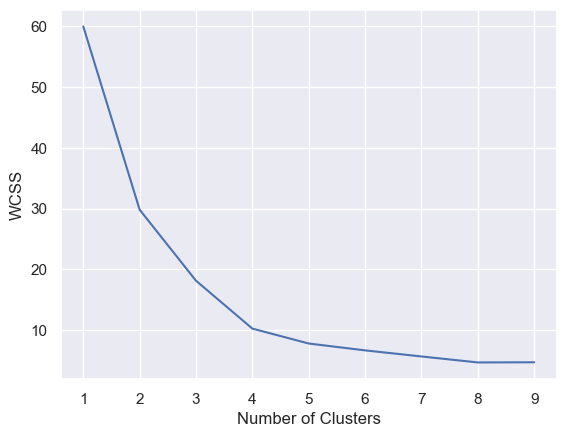

In [45]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

The result is the elbow. 

Given this graph, think about the correct number of clusters we should use. 

There isn't a clear tip of the elbow and we can see 3 or 4 tips that are worth trying - at 2,3,4, and 5 clusters. 

Here is the limitation of the elbow method - we can see the change in WCSS with the increase in the number of clusters, but we don't really know which solution is the best one. 

### Explore Clustering Solutions and Select the Number of Clusters

To start, let's try 2 clusters. We already discussed qualitatively that this is probably a suboptimal solution, but it is worth inspecting the difference with standardized variables.

We'll declare a new varaible, kmeans_new with a KMeans of 2, we will fit the x_scaled data, and finally, we will create a new dataframe called clusters_new, containing the values from x. Then, the column cluster_pred will contain the predicted clusters from this new clustering solution, with the x_scaled:

In [116]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [118]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,8
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,3
8,8,1.02,5
9,8,0.68,5


Here is a crucial moment - the dataframe contains the original 'Satisfaction' values, but the predicted clusters are based on the solution using the standardized data. 

This is VERY IMPORTANT - we will plot the data WITHOUT standardizing the AXES, but the SOLUTION itself will be the standardized one. 

Let's show this by plotting the data:

Text(0, 0.5, 'Loyalty')

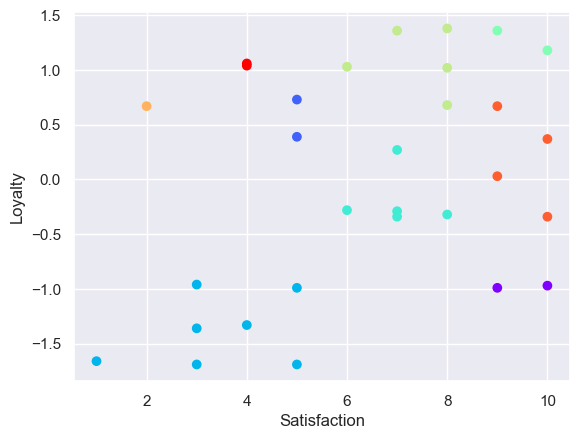

In [121]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

By keeping the original x-axis, we get the intuition, "how satisfied were the customers?". 

If we plot the standardized values, we would be deceived - the middle parts of the two graphs are different. This one is 5.5, and on the standardized graph, the midpoint 0.0, actually corresponds to the mean of the variable, or 6.4. 

We often choose to plot using the original values for clearer interpretability. 

Note: The discrepancy we observe here depends on the range of the axes, too. 

Continuing with the solution - we can see two clusters, as we specified the number to be two, no surprise here. What's different though, is the clusters themselves. Comparing this result with the previous one, we can clearly see that both dimensions were taken into account. Moreover, these two clusters coincide with out initial speculations, that those two clusters would be the result of k = 2. 

So, we are now much more confident that standardization is, generally, a good thing. However, the problem is not solved yet, this 2 cluster solution does not make a lot of sense, as we mentioned before, but it's a good start. 

Let's name the two clusters - one contains people with low loyalty and low satisfaction, so we can call these people 'Alienated' because these customers are dissatisfied and not loyal. As for the other cluster, it is so heterogenous, the we will just call it the 'Everything Else' cluster.

By the way, naming your clusters is VERY IMPORTANT. In unsupervised Machine Learning, clustering included, the algorithm with do the magic but WE need to interpret the result, so naming the clusters helps with interpreting results.

Back to the elbow, noteworthy tips on the elbow were 3,4, and 5. So, let's try them one after the other. 

Since our code is well parameterized, we can just change the number of clusters in the first line, and re-running the code will do the rest.

### 3 Cluster Solution

We have the alienated cluster once more, which is a good sign, as it shows us that we were right in concluding that it is a cluster of its own, while the everything else cluster is now split into 2. 

We can call the group to the top left the 'Supporters', as they are not particularly happy with the shopping experience, but they like the brand and want to keep coming back. Note that there are not that many of them - it is a small cluster. 

Finally, the third cluster to the right is called, well, the 'All that's left' cluster, I guess. We can't really name it, as it is still very much mixed. 

Now, let's check out a four cluster solution

### 4 Cluster Solution

Now, we still have the 'Alienated' and the 'Supporters' clusters, and now we have 2 new clusters that can also be named. 

The upper right one consists of clients that are satisfied and loyal, so we will call them our 'Fans', the core customers. Eventually, we hope that all the points on the graph will turn into 'Fans', but we'll get to that later. 

The last cluster in the bottom right, we have people who are predominantly satisfied, but not loyal (some of them are actually disloyal), a term used to describe such customers is 'Roamers' - they like your brand, but are not very loyal to it. 

Okay, this solution is definitely the best one we have seen so far. But let's try with 5 clusters and see what we get.

### 5 Cluster Solution

We see that the 'Alienated', 'Supporters', and 'Fans' remain unchanged. 

The people on the far right look like the 'Roamers' from before. 

Finally, we have clients that are almost in the middle of our standardized graph - they are almost neutral in the loyalty feature, but are generally satisfied. They are also 'Roamers'. 

This solution actually split the 'Roamers' into two subclusters - those that are extremely satisfied, and those that are just satisfied. So, there isn't much value added to our segmentation. 

We can carry on with as many clusters as we want, but from now on we would just be further segementing the 4 core clusters. 

Let's finish of with 9 clusters:

### 9 Cluster Solution

Similar to what we had with 5 clusters, many of the clusters were further segmented. It is extremely hard to name all of them, and even if we do, we will probably need to use a lot of adjectives. 

For instance, the 'Alienated' cluster is split into 2 - the 'Very Alienated' cluster and the 'Moderately Alienated' cluster. As you can imagine, there is not much to gain in using such a fragmented solution. 

### Conclusion

So, we can see that the 4 and 5 cluster solutions were the best ones. Which one you want to use depends on the problem at hand!